In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
init_printing(use_unicode=True)
import time
import scipy as sp


In [131]:
# Fourier Spectral Methods
# a)
x = symbols('x')
print('a0:')
integrate(1/(2-cos(pi*x)), (x, 0, 2))
# print('a1')
# integrate(cos(x)/(2-cos(pi*x)), (x, 0, 2))


a0:


C:\Users\chris\AppData\Local\Temp\ipykernel_4660\340143338.py:3: RuntimeWarning: overflow encountered in double_scalars
  return 1/(np.sqrt(3)*(2+np.sqrt(3))**abs(n))


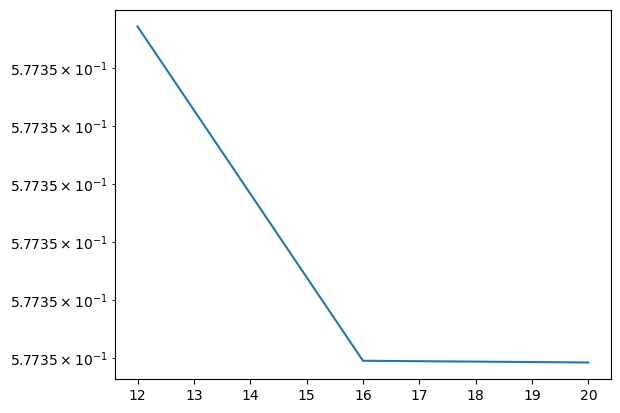

In [7]:
# a) truncation error
def cn(n):
    return 1/(np.sqrt(3)*(2+np.sqrt(3))**abs(n))

Ns = [12,16,20]
errors = np.zeros(len(Ns))
for i,N in enumerate(Ns):
    error = sum([2*cn(i) for i in range(N+1,1000)])
    error += cn(0)
    errors[i] = error

plt.semilogy(Ns,errors)


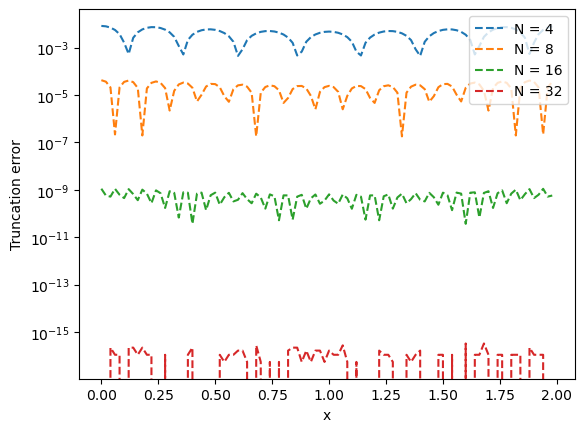

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to approximate
def u(x):
    #return abs(x-1) + abs(x) # sanity check
    return 1/(2-np.cos(x*np.pi))

# Number of sample points
N = 100
# Sample spacing
x = np.linspace(0.0, 2, N, endpoint=False) #change 2 to eg. 0.1 to zoom in
y = u(x)

# Compute the Fourier coefficients
yf = np.fft.fft(y)

#fig, ax = plt.subplots(figsize=(12, 4))
#ax.plot(x, y, label='u(t)')
plt.figure()

Ns = [4,8,16,32] # Number of coefficients to keep
for num_coefficients in Ns: 
    # Zero out higher-order coefficients
    yf_truncated = np.zeros_like(yf)
    yf_truncated[:num_coefficients] = yf[:num_coefficients]
    yf_truncated[-num_coefficients+1:] = yf[-num_coefficients+1:]

    # Reconstruct the function using the truncated Fourier coefficients
    y_reconstructed = np.fft.ifft(yf_truncated)
    plt.semilogy(x, abs(y_reconstructed.real-y), label=f'N = {num_coefficients}', linestyle='--')

# Plot the original and reconstructed functions
plt.xlabel("x")
plt.ylabel("Truncation error")
plt.legend(loc=1)
plt.show()


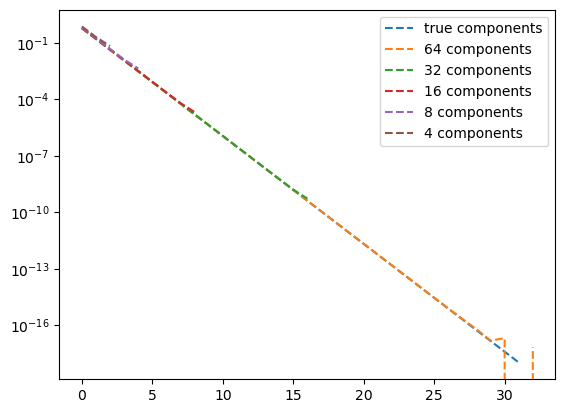

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to approximate
def u(x):
    #return abs(x-1) + abs(x) # sanity check
    return 1/(2-np.cos(x*np.pi))

def cn(n):
    return 1/(np.sqrt(3)*(2+np.sqrt(3))**abs(n))

# Number of sample points
Ns = [4,8,16,32,64]
Ns = [4,8]
Ns = [64,32,16,8,4]

true_cn = cn(np.arange(0,32))
# Plot the original and reconstructed functions
plt.semilogy(true_cn.real, label=f'true components', linestyle='--')

 # Number of coefficients to keep
for N in Ns:
    

    # Sample spacing
    x = np.linspace(0.0, 2, N+1, endpoint=False)
    y = u(x)
    # Compute the Fourier coefficients
   
    yf = np.fft.fft(y)
    yf = np.fft.fftshift(yf)/N

    # plot coeffiecents
    plt.semilogy(yf.real[(N//2):(N+1)], label=f'{N} components', linestyle='--')

plt.legend()
plt.show()


C:\Users\chris\AppData\Local\Temp\ipykernel_13828\1566709476.py:5: RuntimeWarning: invalid value encountered in true_divide
  return 1/N*np.sin(N/2*(x-xjs[j]))*1/(np.tan(1/2*(x-xjs[j])))


<Figure size 640x480 with 0 Axes>

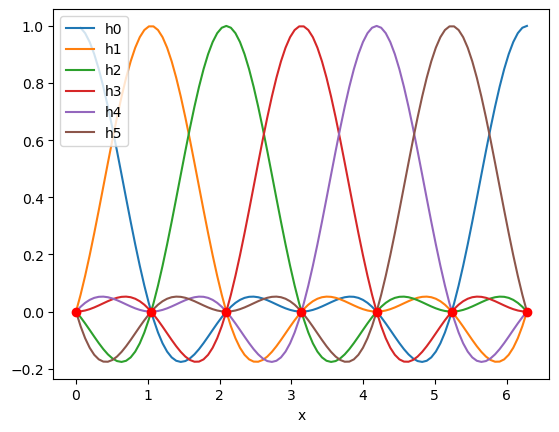

<Figure size 640x480 with 0 Axes>

In [152]:
# part c)
N = 6
xjs = [j*2*np.pi/N for j in range(N+1)]
def lagrange(x,j,N):
    return 1/N*np.sin(N/2*(x-xjs[j]))*1/(np.tan(1/2*(x-xjs[j])))
    # checking intermediate step
    #return 1/N*(np.cos(N*(x-xjs[j])/2)+np.sin((N-1)/2*(x-xjs[j]))/np.sin((x-xjs[j])/2))


x = np.linspace(0.0, 2*np.pi, 100, endpoint=True)
plt.figure()
for j in range(6):
    h = lagrange(x,j,N)
    plt.plot(x,h,label=f'h{j}')

plt.plot(xjs,np.zeros(N+1),'ro')
plt.legend(loc=2)
plt.xlabel("x")
plt.figure()

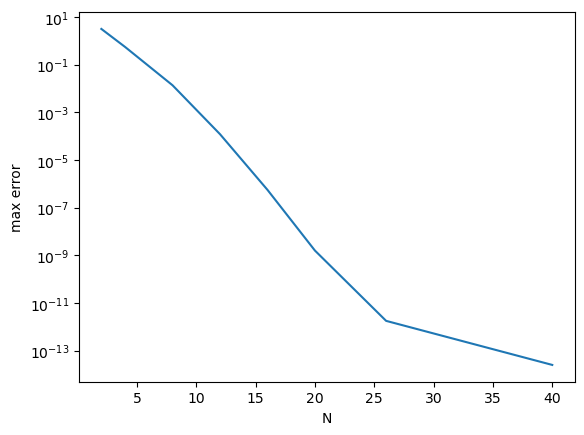

In [3]:
# part d) differentiation
def diff_h(N,j,x,xjs):
    dx = x-xjs[j]
    temp1 = np.cos(N*dx/2)*np.cos(dx/2)*N*np.sin(dx/2)-np.sin(N*dx/2)
    return temp1/(2*N*sin(dx/2)**2)
    #return np.pi*np.cos(np.pi*N*((dx)/2))*1/2*np.tan(np.pi*dx/2)-np.sin(np.pi*N/2*dx)*np.pi*(1+np.tan(np.pi*1/2*dx)**2)/(2*N*np.tan(np.pi*1/2*dx)**2)

def Dmatrix(N,xjs):
    D = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
                # if i != 0 and i != (N-1):
                    if i == j:
                        D[i][j] = 0
                    else: 
                        D[i][j] = diff_h(N,j,xjs[i],xjs)
    for i in range(N):
         s = np.sum(D[i,:])
         D[i][i] = -s
    return D

def v(x):
    return np.exp(np.sin(np.pi*x))
    #return np.exp(np.sin(x))

def v_diff_true(x):
    return np.pi*np.cos(np.pi*x)*np.exp(np.sin(np.pi*x))
    #return np.cos(x)*np.exp(np.sin(x))

Ns = [2,4,8,12,16,20,26,40]
#Ns = [10]
errors = np.zeros(len(Ns))
plt.figure()
for i,N in enumerate(Ns):
    xjs = np.array([j*2/N for j in range(N)]) 
    #print(xjs)
    vx = v(xjs)
    vx_diff_true = v_diff_true(xjs)
    vx_diff = (Dmatrix(N,xjs*np.pi) @ vx)*np.pi
    #print(Dmatrix(N+1,xjs))
    error_vec = vx_diff - vx_diff_true
    #plt.semilogy(xjs,error_vec)
    errors[i] = np.max(error_vec)

#plt.plot(xjs,vx_diff_true,label="true")
#plt.plot(xjs,vx_diff,'ro',label=f'I_{N}') 
plt.xlabel("N")
plt.ylabel("max error")
plt.semilogy(Ns,errors)  
#plt.legend()
plt.show()

In [ ]:
# part e)
def w0(x):
    if x < 0:
        return -np.cos(np.pi *x)
    else:
        return np.cos(np.pi*x)

def w1(x):
    if x < 0:
        return -1/np.pi*np.sin(np.pi *x)
    else:
        return 1/np.pi*np.sin(np.pi*x)
    
def w2(x):
    if x < 0:
        return 1/np.pi**2*np.cos(np.pi *x)-1/np.pi**2
    else:
        return -1/np.pi**2*np.cos(np.pi *x)+1/np.pi**2
    
def w3(x):
    if x < 0:
        return -1/np.pi**3*np.sin(np.pi *x)-x/np.pi**2
    else:
        return 1/np.pi**3*np.sin(np.pi *x)+x/np.pi**2
    
Ns = [5,10,20,30,40,50,100]
#Ns = [5]
errors_0 = np.zeros(len(Ns))
errors_1 = np.zeros(len(Ns))
errors_2 = np.zeros(len(Ns))

for i,N in enumerate(Ns):
    xjs = np.array([j*4/N-2 for j in range(N)])
    #print(xjs)
    w_0 = w0(xjs)
    w_1 = w1(xjs)
    w_2 = w2(xjs)
    w_3 = w3(xjs)
    w0_approx = (Dmatrix(N) @ w_1)
    w1_approx = (Dmatrix(N) @ w_2)
    w2_approx = (Dmatrix(N) @ w_3)
    errors_0[i] = np.linalg.norm(w0_approx-w0,2)*np.sqrt(4/N)
    errors_1[i] = np.linalg.norm(w1_approx-w1,2)*np.sqrt(4/N)
    errors_2[i] = np.linalg.norm(w2_approx-w2,2)*np.sqrt(4/N)

In [ ]:
# part f
def vfun(x):
    return np.exp(np.sin(np.pi*x))
vfun = np.vectorize(vfun)

def v_diff_true(x):
    return np.pi*np.cos(np.pi*x)*np.exp(np.sin(np.pi*x))

def fft_derivative(N, fun, L = 2*np.pi):
    
    h = L/N
    X = np.arange(N)*h
    f = fun(X)

    k = sp.fft.fftfreq(N,1/N) * 1j

    return np.real(sp.fft.ifft( k * sp.fft.fft(f) ))*2*np.pi/L


#Ns = [4,8,16,32,64,128,256,512]
Ns = [50,100,150,200,500,1000]
#errors = np.zeros(len(Ns))
time_matrix = np.zeros(len(Ns))
time_fft = np.zeros(len(Ns))
plt.figure()
reps = 1
for i,N in enumerate(Ns):
    xjs = np.array([j*2/N for j in range(N)]) 
    vx = vfun(xjs)
    #vx_diff_true = v_diff_true(xjs)
    
    Dmat = Dmatrix(N,xjs*np.pi)
    for _ in range(reps):
        t1 = time.time()
        vx_diff_matrix = (Dmat @ vx)*np.pi
        t2 = time.time()
        time_matrix[i] += (t2-t1)/reps
    for _ in range(reps):
        #vx_diff_fft = fft_derivative(N,vfun,L=2)
        h = 2/N
        X = np.arange(N)*h
        f = vfun(X)
        k = sp.fft.fftfreq(N,1/N) * 1j
        t1 = time.time()
        vx_diff_fft = np.real(sp.fft.ifft( k * sp.fft.fft(f) ))*2*np.pi/2
        t2 = time.time()
        time_fft[i] += (t2-t1)/reps

plt.figure()
plt.loglog(Ns,time_fft,label="FFT method")
plt.loglog(Ns,time_matrix,label="Differentiation Matrix")
plt.legend()
plt.xlabel("N")
plt.ylabel("Time [s]")
